In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestCentroid
from sklearn.metrics import accuracy_score, recall_score, precision_score
from imblearn.over_sampling import RandomOverSampler
from category_encoders.target_encoder import TargetEncoder

In [2]:
columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
df = pd.read_csv('C:/Users/lemes/OneDrive/Рабочий стол/dz/abalone.data', names=columns)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [4]:
# ми бачимо або дуже маленькі, або пропущенні значення по Height
df.sort_values('Height')

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
3996,I,0.315,0.230,0.000,0.1340,0.0575,0.0285,0.3505,6
1257,I,0.430,0.340,0.000,0.4280,0.2065,0.0860,0.1150,8
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
2169,I,0.165,0.115,0.015,0.0145,0.0055,0.0030,0.0050,4
1174,F,0.635,0.495,0.015,1.1565,0.5115,0.3080,0.2885,9
...,...,...,...,...,...,...,...,...,...
1763,M,0.775,0.630,0.250,2.7795,1.3485,0.7600,0.5780,12
1428,F,0.815,0.650,0.250,2.2550,0.8905,0.4200,0.7975,14
2179,F,0.595,0.470,0.250,1.2830,0.4620,0.2475,0.4450,14
1417,M,0.705,0.565,0.515,2.2100,1.1075,0.4865,0.5120,10


C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


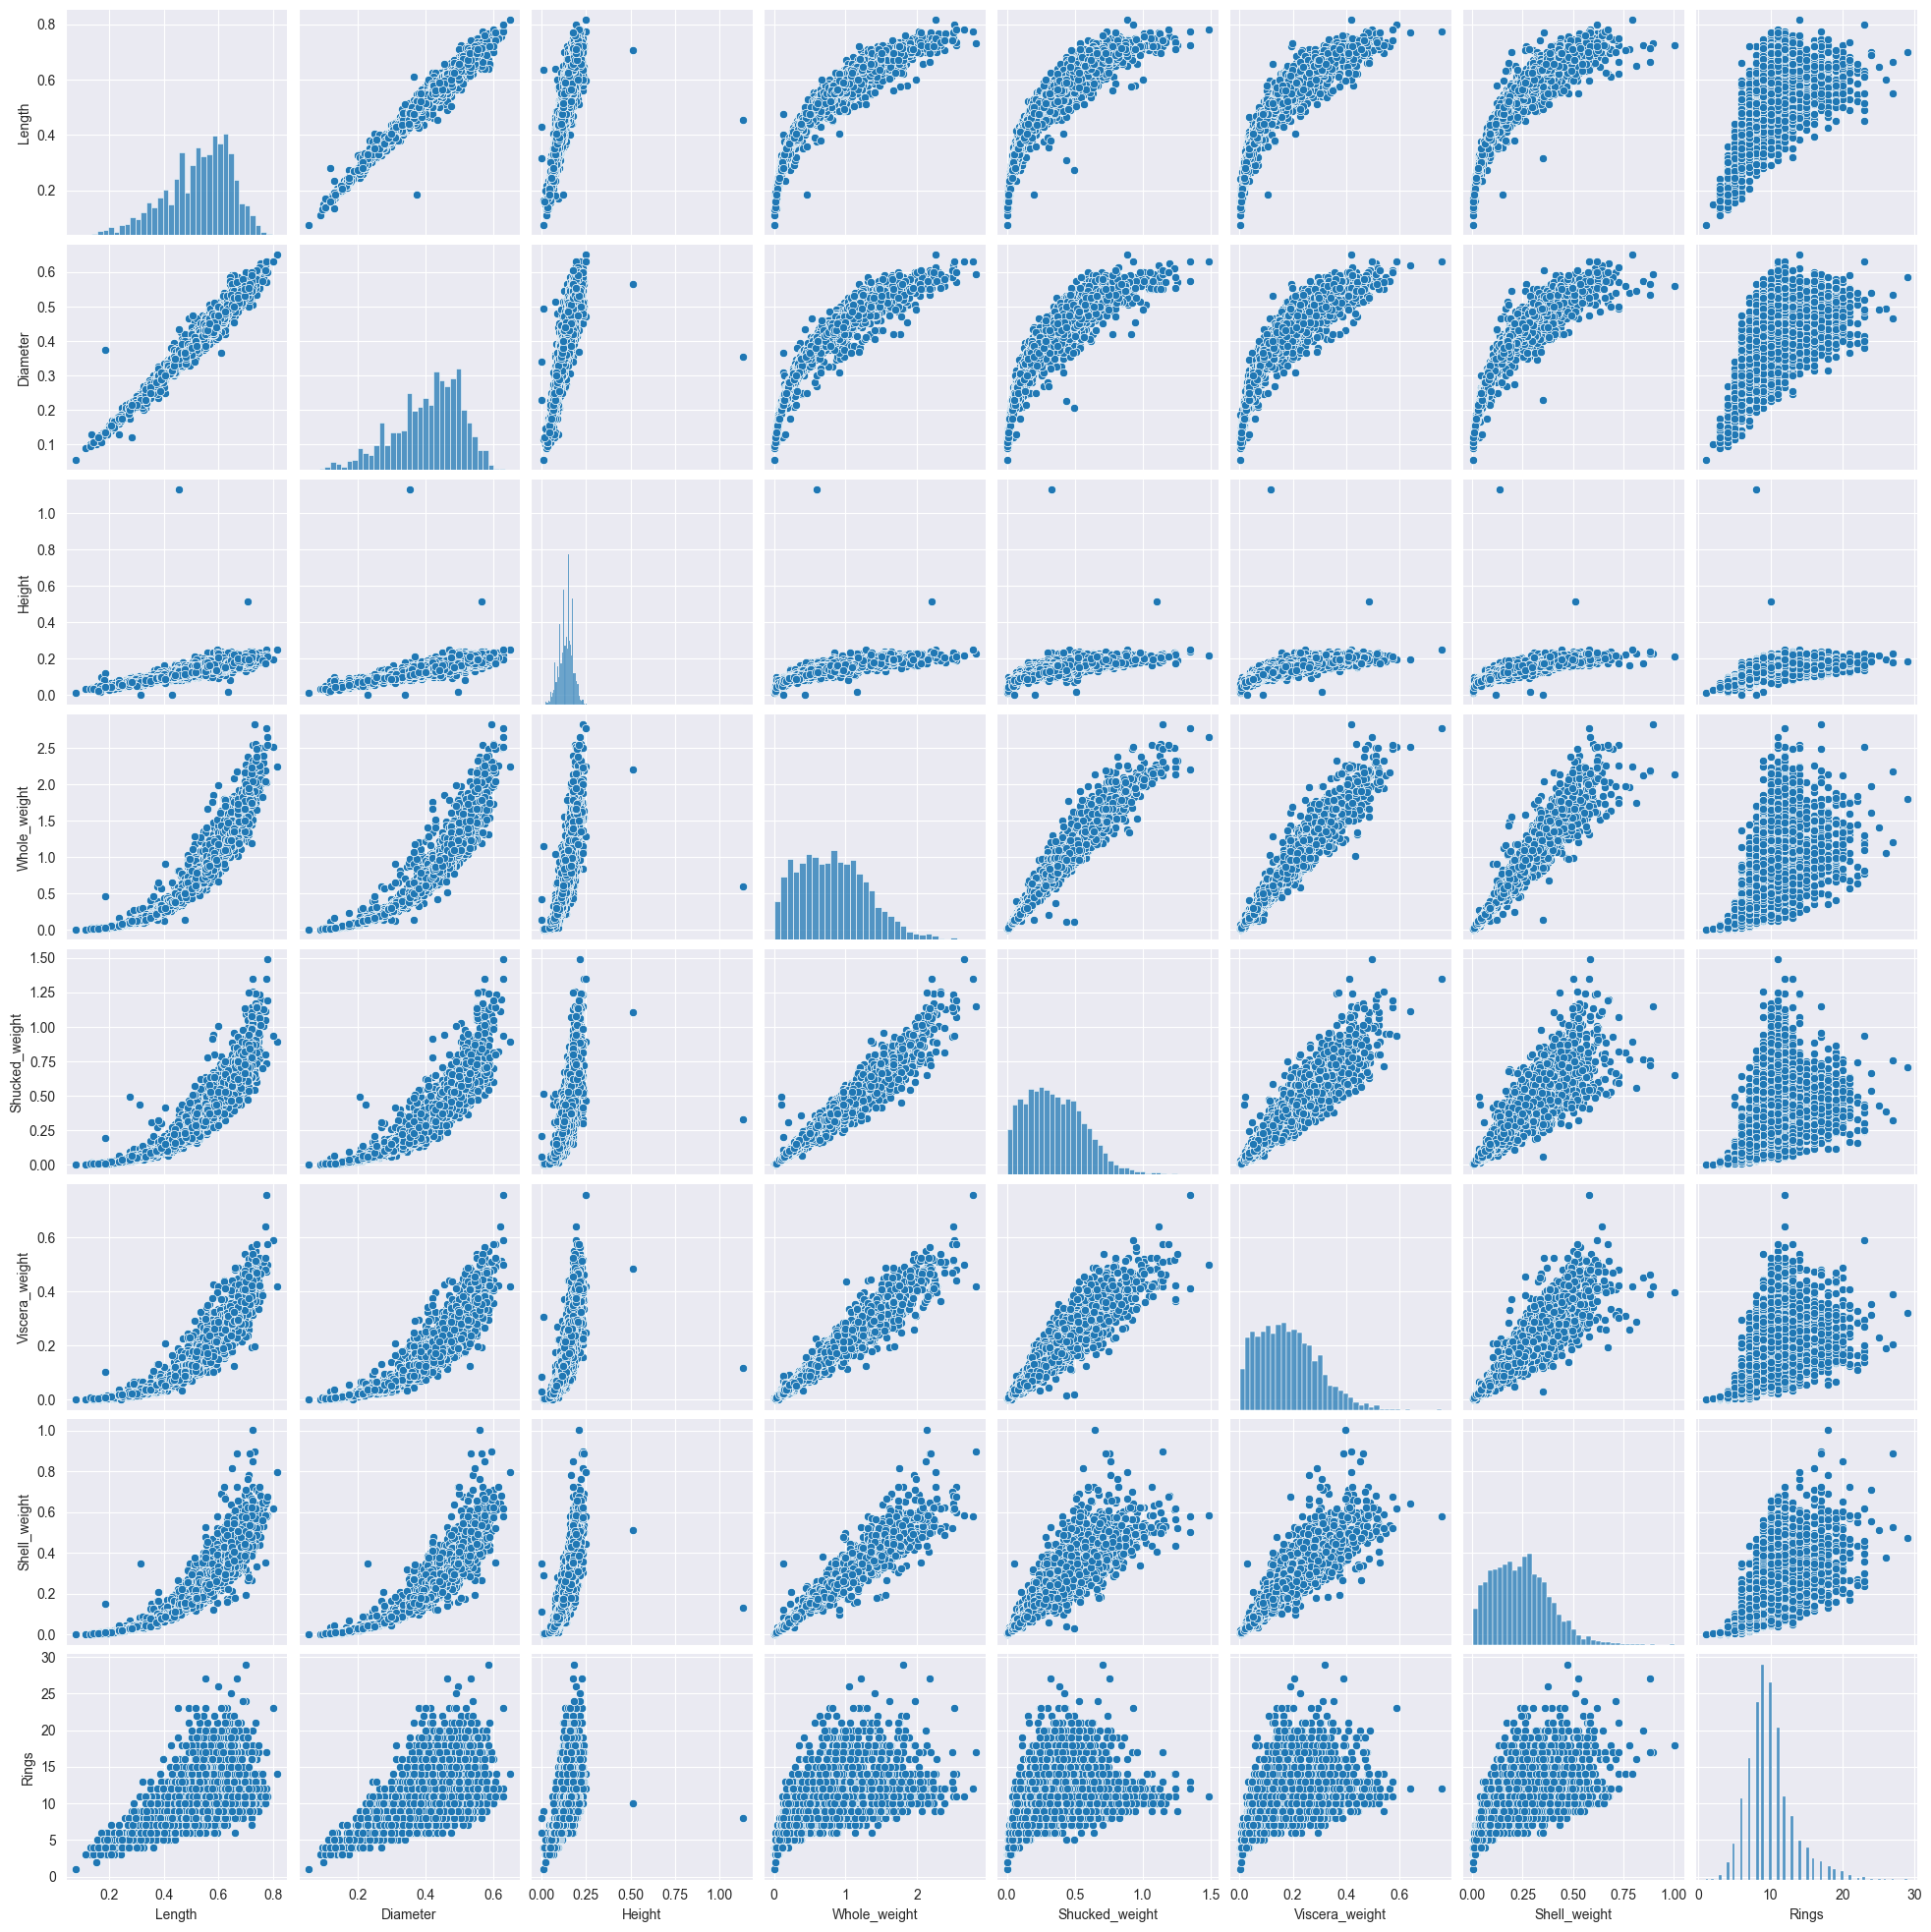

In [5]:
sns.pairplot(df)

Бачимо що тут наче корелюєтсья все зі вісім

<Axes: xlabel='Diameter', ylabel='Length'>

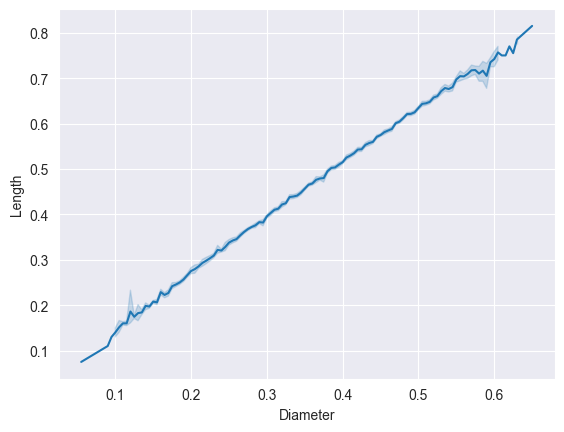

In [6]:
sns.lineplot(x=df['Diameter'],y=df['Length'])

<Axes: xlabel='Whole_weight', ylabel='Shell_weight'>

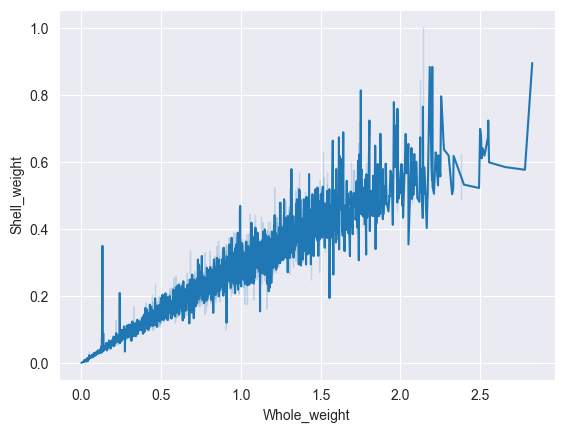

In [7]:
sns.lineplot(x=df['Whole_weight'], y=df['Shell_weight'])

In [8]:
#Зробимо копію датасету щоб працювати з ним
fica_df = df.copy()

In [9]:
fica_df.query("Height == 0")

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [10]:
fica_df.query("Length == 0.315")['Height'].mean()

0.0703125

In [11]:
fica_df.query("Length == 0.430")['Height'].mean()

0.10515625

In [12]:
fica_df.loc[(fica_df['Length'] == 0.430) & (fica_df['Height'] == 0), 'Height'] = fica_df.query("Length == 0.430")['Height'].mean()

In [13]:
fica_df.loc[(fica_df['Length'] == 0.315) & (fica_df['Height'] == 0), 'Height'] = fica_df.query("Length == 0.315")['Height'].mean()

In [14]:
fica_df.query("Height == 0")

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings


In [15]:
# зробимо фічу Volume (всі фізичні параметри)
fica_df['Volume'] = fica_df['Height'] * fica_df['Length'] * fica_df['Diameter']
fica_df.drop(['Height', 'Length', 'Diameter'], axis=1, inplace=True)

In [16]:
# зробимо фічу від усіх ваг
scaller = StandardScaler(with_mean=False)
scaller = scaller.fit([fica_df['Whole_weight'], fica_df['Shell_weight'], fica_df['Viscera_weight'], fica_df['Shucked_weight']])
fica_df['mean_weight'] = scaller.mean_
fica_df.drop(['Whole_weight', 'Shell_weight', 'Viscera_weight', 'Shucked_weight'], axis=1, inplace=True)

C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


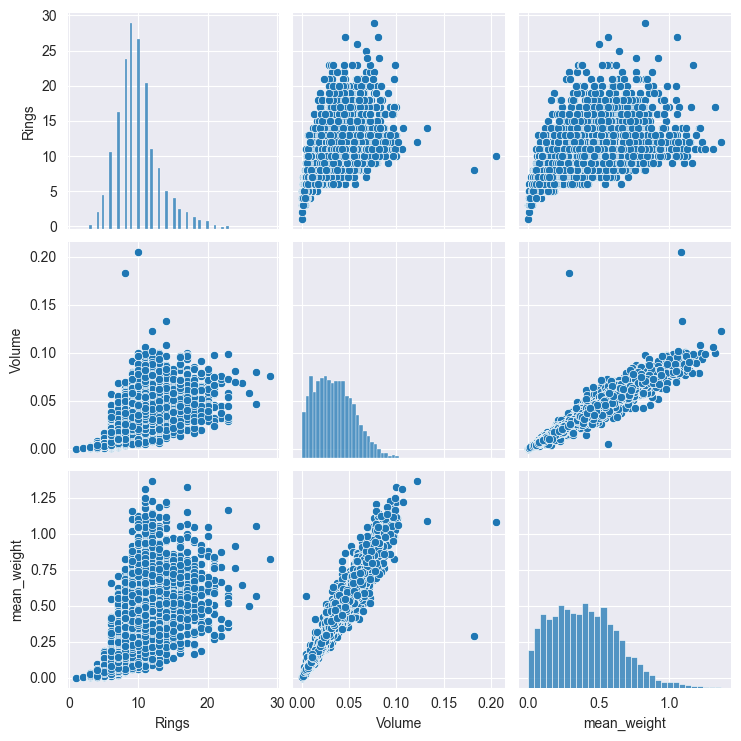

In [17]:
sns.pairplot(fica_df)

Певна кореляція так і зберігаєтсья

In [18]:
# Залишимо 1 фічу
scaller = scaller.fit([fica_df['Volume'], fica_df['mean_weight']])
fica_df['params'] = scaller.mean_
fica_df.drop(['mean_weight', 'Volume'],axis=1, inplace=True)

In [19]:
fica_df.groupby('Rings').count()

,Sex,params
Rings,,
1,1,1
2,1,1
3,15,15
4,57,57
5,115,115
6,259,259
7,391,391
8,568,568
9,689,689


Оскільки в нас не вистачає данних у межах 1-5, 16-20 та 20-29 зробимо з них 3 группи

In [20]:
for i in range(1,6):
    fica_df['Rings'].replace(i, 5, inplace=True)
for i in range(16,20):
    fica_df['Rings'].replace(i, 16, inplace=True)
for i in range(20,30):
    fica_df['Rings'].replace(i, 17, inplace=True)

In [21]:
fica_df.groupby('Rings').count()

,Sex,params
Rings,,
5,189,189
6,259,259
7,391,391
8,568,568
9,689,689
10,634,634
11,487,487
12,267,267
13,203,203


In [22]:
TE_encoder = TargetEncoder()
df_te = TE_encoder.fit_transform(fica_df[['Sex']], fica_df['Rings'])
fica_df['Sex'] = df_te
fica_df.Sex.unique()

array([10.56609948, 10.92960979,  7.92697466])

In [23]:
train_df, testі_df = train_test_split(fica_df, test_size=0.6, stratify=fica_df['Rings'])
test_df, valid_df =  train_test_split(testі_df, test_size=0.5)

In [24]:
train_target = train_df['Rings']
test_target = test_df['Rings']
valid_target = valid_df['Rings']
train_df.drop('Rings', axis=1, inplace=True)
test_df.drop('Rings', axis=1, inplace=True)
valid_df.drop('Rings', axis=1, inplace=True)

Перейдемо до побудови моделей

In [25]:
def kneiborclass(text, learn_df, target_learn, test_df, target_test, neighbour=2):
    model = KNeighborsClassifier(n_neighbors=neighbour, weights='uniform')
    model = model.fit(learn_df, target_learn)
    msg1 = f'Модель  {text}'
    prediciton1 = model.predict(learn_df)
    msg1 += '\nНа навчальній виборці маємо такі показники:'
    msg1 += f'\naccuracy = {accuracy_score(target_learn, prediciton1)}'
    msg1 += f'\nprecision = {precision_score(target_learn, prediciton1, average="macro")}'
    msg1 += f'\nrecal = {recall_score(target_learn, prediciton1, average="macro")}'
    msg1 += '\nНа тестовій виборці маємо такі показники:'
    prediciton2 = model.predict(test_df)
    msg1 += f'\naccuracy = {accuracy_score(target_test, prediciton2)}'
    msg1 += f'\nprecision = {precision_score(target_test, prediciton2, average="macro")}'
    msg1 += f'\nrecal = {recall_score(target_test, prediciton2, average="macro")}'
    return msg1, prediciton1, prediciton2

In [26]:
def kneiborreg(text, learn_df, target_learn, test_df, target_test, neighbour=4):
    model = KNeighborsRegressor(n_neighbors=neighbour, algorithm='kd_tree', leaf_size=10)
    model = model.fit(learn_df, target_learn)
    msg1 = f'Модель  {text}'
    prediciton1 = model.predict(learn_df)
    # оскільки це регрессія - вона нам буде видавати не цілі числа
    prediciton1 = np.round(prediciton1)
    msg1 += '\nНа навчальній виборці маємо такі показники:'
    msg1 += f'\naccuracy = {accuracy_score(target_learn, prediciton1)}'
    msg1 += f'\nprecision = {precision_score(target_learn, prediciton1, average="macro")}'
    msg1 += f'\nrecal = {recall_score(target_learn, prediciton1, average="macro")}'
    msg1 += '\nНа тестовій виборці маємо такі показники:'
    prediciton2 = model.predict(test_df)
    prediciton2 = np.round(prediciton2)
    msg1 += f'\naccuracy = {accuracy_score(target_test, prediciton2)}'
    msg1 += f'\nprecision = {precision_score(target_test, prediciton2, average="macro")}'
    msg1 += f'\nrecal = {recall_score(target_test, prediciton2, average="macro")}'
    return msg1, prediciton1, prediciton2

In [27]:
def nerestcentroid(text, learn_df, target_learn, test_df, target_test, threshold=0.3):
    model = NearestCentroid(metric='manhattan',  shrink_threshold=threshold)
    model = model.fit(learn_df, target_learn)
    msg1 = f'Модель  {text}'
    prediciton1 = model.predict(learn_df)
    msg1 += '\nНа навчальній виборці маємо такі показники:'
    msg1 += f'\naccuracy = {accuracy_score(target_learn, prediciton1)}'
    msg1 += f'\nprecision = {precision_score(target_learn, prediciton1, average="macro")}'
    msg1 += f'\nrecal = {recall_score(target_learn, prediciton1, average="macro")}'
    msg1 += '\nНа тестовій виборці маємо такі показники:'
    prediciton2 = model.predict(test_df)
    msg1 += f'\naccuracy = {accuracy_score(target_test, prediciton2)}'
    msg1 += f'\nprecision = {precision_score(target_test, prediciton2, average="macro")}'
    msg1 += f'\nrecal = {recall_score(target_test, prediciton2, average="macro")}'
    return msg1, prediciton1, prediciton2

In [28]:
msg, pred1, pred2 = kneiborclass(text = 'KNeighborsClassifier', learn_df=train_df, target_learn=train_target, test_df=test_df, target_test=test_target)

In [29]:
print(msg)

Модель  KNeighborsClassifier
На навчальній виборці маємо такі показники:
accuracy = 0.5970059880239521
precision = 0.6462273082971444
recal = 0.4827923865461
На тестовій виборці маємо такі показники:
accuracy = 0.2162809257781325
precision = 0.16480709623661866
recal = 0.18624600984102255


In [30]:
test = pd.DataFrame()
test['Target'] = test_target
test['Prediction'] = pred2
test['qality'] = test['Target'] - test['Prediction']
test.query("qality > 3 or qality < -3")

,Target,Prediction,qality
3402,13,7,6
3459,8,16,-8
482,15,8,7
450,16,10,6
758,13,9,4
...,...,...,...
3616,14,9,5
385,9,16,-7
3164,13,9,4
1394,15,11,4


In [31]:
stat = test.query("qality > 3 or qality < -3").shape[0] / test.shape[0] *100
stat

17.4780526735834

17 відсотків у нас не класифікує +- 3 бали

In [32]:
msg1, pred3, pred4 = kneiborreg(text = 'KNeighborsRegressor', learn_df=train_df, target_learn=train_target.values, test_df=test_df, target_test=test_target.values)

C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
print(msg1)

Модель  KNeighborsRegressor
На навчальній виборці маємо такі показники:
accuracy = 0.2694610778443114
precision = 0.33113631891767703
recal = 0.2216410043872733
На тестовій виборці маємо такі показники:
accuracy = 0.2114924181963288
precision = 0.19960910952864866
recal = 0.18991013857544972


In [34]:
test2 = pd.DataFrame()
test2['Target'] = test_target
test2['Prediction'] = pred4
test2['qality'] = test2['Target'] - test2['Prediction']
test2.query("qality > 3 or qality < -3")

,Target,Prediction,qality
3402,13,8.0,5.0
3923,12,8.0,4.0
3459,8,14.0,-6.0
482,15,10.0,5.0
450,16,11.0,5.0
...,...,...,...
2955,15,10.0,5.0
4036,8,12.0,-4.0
1165,9,14.0,-5.0
480,17,12.0,5.0


In [35]:
stat2 = test2.query("qality > 3 or qality < -3").shape[0] / test2.shape[0] *100
stat2

14.84437350359138

ця модель також відпрацювала +- 15 відсотків на класифікацію

In [36]:
msg2, pred5, pred6 = nerestcentroid(text = 'NearestCentroid', learn_df=train_df, target_learn=train_target.values, test_df=test_df, target_test=test_target.values)

C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
print(msg2)

Модель  NearestCentroid
На навчальній виборці маємо такі показники:
accuracy = 0.20838323353293414
precision = 0.15709501923581778
recal = 0.19377950280336842
На тестовій виборці маємо такі показники:
accuracy = 0.189146049481245
precision = 0.14463865230838518
recal = 0.1855394175766638


In [38]:
test3 = pd.DataFrame()
test3['Target'] = test_target
test3['Prediction'] = pred6
test3['qality'] = test3['Target'] - test3['Prediction']
test3.query("qality > 3 or qality < -3")

,Target,Prediction,qality
3548,7,16,-9
3402,13,9,4
2911,11,16,-5
482,15,9,6
450,16,11,5
...,...,...,...
480,17,12,5
2031,10,16,-6
385,9,16,-7
1394,15,11,4


In [39]:
stat3 = test3.query("qality > 3 or qality < -3").shape[0] / test3.shape[0] *100
stat3

22.027134876296888

В цій моделі бачимо велику похибку

In [40]:
# Подивимось яка модель підходить нам більше
msg, pred1, pred2 = kneiborclass(text = 'KNeighborsClassifier', learn_df=train_df, target_learn=train_target.values, test_df=valid_df, target_test=valid_target.values)
msg1, pred3, pred4 = kneiborreg(text = 'KNeighborsRegressor', learn_df=train_df, target_learn=train_target.values, test_df=valid_df, target_test=valid_target.values)
msg2, pred5, pred6 = nerestcentroid(text = 'NearestCentroid', learn_df=train_df, target_learn=train_target.values, test_df=valid_df, target_test=valid_target.values)

C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U

In [41]:
print(msg)
print(msg1)
print(msg2)

Модель  KNeighborsClassifier
На навчальній виборці маємо такі показники:
accuracy = 0.5970059880239521
precision = 0.6462273082971444
recal = 0.4827923865461
На тестовій виборці маємо такі показники:
accuracy = 0.20733652312599682
precision = 0.14680708883434904
recal = 0.17694688570359668
Модель  KNeighborsRegressor
На навчальній виборці маємо такі показники:
accuracy = 0.2694610778443114
precision = 0.33113631891767703
recal = 0.2216410043872733
На тестовій виборці маємо такі показники:
accuracy = 0.20972886762360446
precision = 0.18472845594404955
recal = 0.1831195156078936
Модель  NearestCentroid
На навчальній виборці маємо такі показники:
accuracy = 0.20838323353293414
precision = 0.15709501923581778
recal = 0.19377950280336842
На тестовій виборці маємо такі показники:
accuracy = 0.19776714513556617
precision = 0.15022602385916237
recal = 0.18374501660025777


In [42]:
# Подивимось який війдсоток +- 3 кільця наша модель не вгадала

In [43]:
test = pd.DataFrame()
test['Target'] = valid_target
test['Prediction'] = pred2
test['qality'] = test['Target'] - test['Prediction']
test.query("qality > 3 or qality < -3")
stat1 = test.query("qality > 3 or qality < -3").shape[0] / test.shape[0] *100
stat1

18.819776714513555

In [44]:
test2 = pd.DataFrame()
test2['Target'] = valid_target
test2['Prediction'] = pred4
test2['qality'] = test2['Target'] - test2['Prediction']
test2.query("qality > 3 or qality < -3")
stat2 = test2.query("qality > 3 or qality < -3").shape[0] / test2.shape[0] *100
stat2

14.832535885167463

In [45]:
test3 = pd.DataFrame()
test3['Target'] = valid_target
test3['Prediction'] = pred6
test3['qality'] = test3['Target'] - test3['Prediction']
test3.query("qality > 3 or qality < -3")
stat3 = test3.query("qality > 3 or qality < -3").shape[0] / test3.shape[0] *100
stat3

24.16267942583732

Бачимо, що регрессія впоралась краще

In [46]:
valid_df['target'] = valid_target
valid_df['prediction'] = pred4

In [47]:
valid_df['error'] = valid_df['prediction'] - valid_df['target'] 

In [48]:
err = valid_df.query("error > 3 or error < -3")

In [49]:
err.groupby(['target', 'prediction']).agg({'error':'count'})

error
target prediction       
5      9.0             1
6      10.0            9
7      11.0            8
       12.0            3
8      12.0           11
       13.0            3
9      13.0            7
       14.0            8
10     6.0             1
       14.0            6
       15.0            1
       16.0            1
11     6.0             1
       7.0             2
       15.0            1
12     8.0             5
13     8.0             3
       9.0             5
14     8.0             4
       9.0             2
       10.0           12
15     8.0             3
       9.0             6
       10.0            6
       11.0            6
16     7.0             1
       8.0             3
       9.0             5
       10.0           18
       11.0            7
       12.0           21
17     9.0             3
       10.0            4
       11.0            3
       12.0            5
       13.0            1

Бачимо що більш за все помилок ми зробили у таргеті 8-12 подивимось на нього

In [50]:
train_df['target'] = train_target

In [51]:
train_df.query("target == 12").describe()

,Sex,params,target
count,107.000000,107.000000,107.0
mean,10.544557,0.286494,12.0
std,0.815136,0.125025,0.0
min,7.926975,0.068250,12.0
25%,10.566099,0.174397,12.0
50%,10.929610,0.288532,12.0
75%,10.929610,0.352504,12.0
max,10.929610,0.614434,12.0


In [52]:
valid_df.query("target == 8").describe()

,Sex,params,target,prediction,error
count,160.000000,160.000000,160.0,160.000000,160.000000
mean,9.302745,0.169172,8.0,9.262500,1.262500
std,1.403099,0.076767,0.0,1.576109,1.576109
min,7.926975,0.026155,8.0,6.000000,-2.000000
25%,7.926975,0.118025,8.0,8.000000,0.000000
50%,7.926975,0.154627,8.0,9.000000,1.000000
75%,10.566099,0.222592,8.0,10.000000,2.000000
max,10.929610,0.443322,8.0,13.000000,5.000000


Бачимо що у нас саме ці группи будуть пересікатися

Перейдемо до відокремлювання статі

In [53]:
sex_df = df.copy()

In [54]:
sex_df.loc[(sex_df['Length'] == 0.430) & (sex_df['Height'] == 0), 'Height'] = sex_df.query("Length == 0.430")['Height'].mean()

In [55]:
sex_df.loc[(sex_df['Length'] == 0.315) & (sex_df['Height'] == 0), 'Height'] = sex_df.query("Length == 0.315")['Height'].mean()

In [56]:
# зробимо фічу Volume (всі фізичні параметри)
sex_df['Volume'] = sex_df['Height'] * sex_df['Length'] * sex_df['Diameter']
sex_df.drop(['Height', 'Length', 'Diameter'], axis=1, inplace=True)

In [57]:
# зробимо фічу від усіх ваг
scaller = scaller.fit([sex_df['Whole_weight'], sex_df['Shell_weight'], sex_df['Viscera_weight'], sex_df['Shucked_weight']])
sex_df['mean_weight'] = scaller.mean_
sex_df.drop(['Whole_weight', 'Shell_weight', 'Viscera_weight', 'Shucked_weight'], axis=1, inplace=True)

In [58]:
# Залишимо 1 фічу
scaller = scaller.fit([sex_df['Volume'], sex_df['mean_weight']])
sex_df['params'] = scaller.mean_
sex_df.drop(['mean_weight', 'Volume'],axis=1, inplace=True)

C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


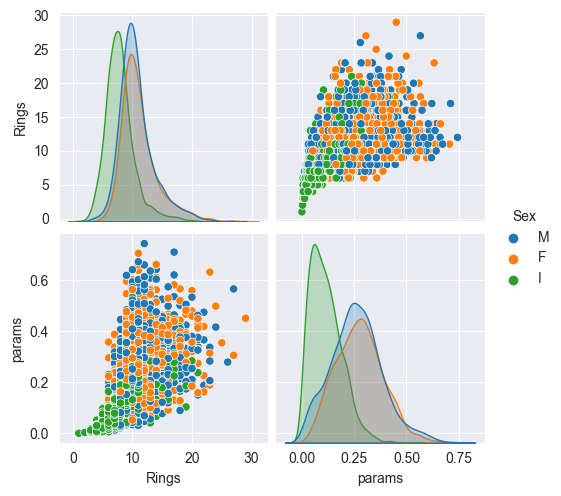

In [59]:
sns.pairplot(sex_df, hue='Sex')

In [60]:
# бачимо що ми не відокремимо чоловічу та жіночу стать
sex_df['Sex'].replace("M", 1, inplace=True)
sex_df['Sex'].replace("F", 1, inplace=True)
sex_df['Sex'].replace("I", 0, inplace=True)

In [61]:
df_te = TE_encoder.fit_transform(sex_df[['Rings']], sex_df['Sex'])
sex_df['Rings'] = df_te
sex_df.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

C:\Users\lemes\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


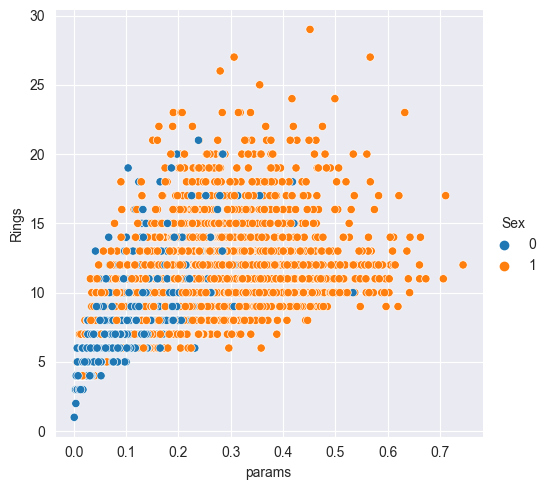

In [62]:
sns.relplot(x=sex_df['params'], y=sex_df['Rings'], hue=sex_df['Sex'])

In [63]:
sex_df.groupby('Sex').count()

,Rings,params
Sex,,
0,1342,1342
1,2835,2835


In [64]:
train_sex, testi_sex = train_test_split(sex_df, test_size=0.4 ,stratify=sex_df['Sex'])
test_sex, valid_sex = train_test_split(testi_sex, test_size=0.5)

In [65]:
trainsex_target = train_sex['Sex']
train_sex.drop('Sex', axis=1, inplace=True)
testsex_target = test_sex['Sex']
test_sex.drop('Sex', axis=1, inplace=True)
validsex_target = valid_sex['Sex']
valid_sex.drop('Sex',axis=1, inplace=True)

In [66]:
msg, pred1, pred2 = kneiborclass(text = 'KNeighborsClassifier', learn_df=train_sex, target_learn=trainsex_target.values, test_df=test_sex, target_test=testsex_target.values, neighbour=6)

In [67]:
print(msg)

Модель  KNeighborsClassifier
На навчальній виборці маємо такі показники:
accuracy = 0.8447725458898643
precision = 0.8207476977844932
recal = 0.8274186539887023
На тестовій виборці маємо такі показники:
accuracy = 0.8275449101796407
precision = 0.8052458716076523
recal = 0.8029545454545455


In [68]:
# подивимось чи не помиляемось ми тільки в одному класі
see_df = pd.DataFrame()
see_df['target'] = testsex_target
see_df['Predict'] = pred2
see_df['error'] = see_df['target'] == see_df['Predict']
see_df.query('error == False')

,target,Predict,error
1881,0,1,False
112,0,1,False
1319,0,1,False
2102,0,1,False
1766,1,0,False
...,...,...,...
1865,0,1,False
3038,0,1,False
2000,0,1,False
220,1,0,False


In [69]:
msg2, pred3, pred4 = kneiborreg(text = 'KNeighborsRegressor', learn_df=train_sex, target_learn=trainsex_target.values, test_df=test_sex, target_test=testsex_target.values, neighbour=7)

In [70]:
print(msg2)

Модель  KNeighborsRegressor
На навчальній виборці маємо такі показники:
accuracy = 0.8399840383080607
precision = 0.8215259150298521
recal = 0.8039337474120083
На тестовій виборці маємо такі показники:
accuracy = 0.8335329341317366
precision = 0.8174322487587029
recal = 0.7972402597402597


In [71]:
msg3, pred5, pred6 = nerestcentroid(text = 'NearestCentroid', learn_df=train_sex, target_learn=trainsex_target.values, test_df=test_sex, target_test=testsex_target.values, threshold=0.001)

In [72]:
print(msg3)

Модель  NearestCentroid
На навчальній виборці маємо такі показники:
accuracy = 0.7689545091779728
precision = 0.7409828523293683
recal = 0.7624083020218286
На тестовій виборці маємо такі показники:
accuracy = 0.8083832335329342
precision = 0.786421162812827
recal = 0.8127272727272727


подивимось яка модель краще буде підходити

In [73]:
msg, pred1, pred2 = kneiborclass(text = 'KNeighborsClassifier', learn_df=train_sex, target_learn=trainsex_target.values, test_df=valid_sex, target_test=validsex_target.values, neighbour=6)
msg2, pred3, pred4 = kneiborreg(text = 'KNeighborsRegressor', learn_df=train_sex, target_learn=trainsex_target.values, test_df=valid_sex, target_test=validsex_target.values, neighbour=7)
msg3, pred5, pred6 = nerestcentroid(text = 'NearestCentroid', learn_df=train_sex, target_learn=trainsex_target.values, test_df=valid_sex, target_test=validsex_target.values, threshold=0.001)

In [74]:
print(msg)
print(msg2)
print(msg3)

Модель  KNeighborsClassifier
На навчальній виборці маємо такі показники:
accuracy = 0.8447725458898643
precision = 0.8207476977844932
recal = 0.8274186539887023
На тестовій виборці маємо такі показники:
accuracy = 0.7978468899521531
precision = 0.7651107121484141
recal = 0.7739513790993962
Модель  KNeighborsRegressor
На навчальній виборці маємо такі показники:
accuracy = 0.8399840383080607
precision = 0.8215259150298521
recal = 0.8039337474120083
На тестовій виборці маємо такі показники:
accuracy = 0.8050239234449761
precision = 0.7746506464672849
recal = 0.7656927414421364
Модель  NearestCentroid
На навчальній виборці маємо такі показники:
accuracy = 0.7689545091779728
precision = 0.7409828523293683
recal = 0.7624083020218286
На тестовій виборці маємо такі показники:
accuracy = 0.7870813397129187
precision = 0.7605
recal = 0.7910072612176504


Висновок - модель KNeighborsRegressor краще впоралась з нашим завданням